In [1]:
import awkward as ak
import pickle
import matplotlib.pyplot as plt

In [2]:
model_list = ["PhyGHT", "ParticleNet", "PUMINet"]
mu=60

In [3]:
def get_filename_from_model(model):
    return "data/"+model+"_mu"+str(mu)+"_10k_events_test_results.pkl"

In [4]:
def load_jets_from_file(file):
    with open(file, 'rb') as f:
        data = pickle.load(f)
    return data["jets"]

In [5]:
def get_resolution(jet_array):
    mask = (jet_array[:,:,4]>0.2)&(jet_array[:,:,5]>0.1)
    jet_true_efrac = jet_array[mask][:,:,4]
    jet_pred_efrac = jet_array[mask][:,:,6]
    jet_energy_resolution = (jet_pred_efrac - jet_true_efrac) / jet_true_efrac
    jet_true_mfrac = jet_array[mask][:,:,5]
    jet_pred_mfrac = jet_array[mask][:,:,7]
    jet_mass_resolution = (jet_pred_mfrac - jet_true_mfrac) / jet_true_mfrac
    return jet_energy_resolution, jet_mass_resolution

In [6]:
def get_results(model):
    filename = get_filename_from_model(model)
    jets = load_jets_from_file(filename)
    energy_resolution, mass_resolution = get_resolution(jets)
    print("Results for ", model)
    print("\tEnergy Mean: ", ak.mean(energy_resolution))
    print("\tEnergy Variance: ", ak.std(energy_resolution))
    print("\tMass Mean: ", ak.mean(mass_resolution))
    print("\tMass Variance: ", ak.std(mass_resolution))
    print()
    return [energy_resolution, mass_resolution]

In [7]:
results = {}
for model in model_list:
    results[model] = get_results(model)

Results for  PhyGHT
	Energy Mean:  -0.08285179163961441
	Energy Variance:  0.2222833128039151
	Mass Mean:  -0.05077614331060292
	Mass Variance:  0.3077686404571911

Results for  ParticleNet
	Energy Mean:  -0.12457307612507276
	Energy Variance:  0.34096162920342776
	Mass Mean:  -0.10357723970988962
	Mass Variance:  0.4349926727654804

Results for  PUMINet
	Energy Mean:  -0.05514026363017785
	Energy Variance:  0.22814700293979184
	Mass Mean:  -0.03579975266653949
	Mass Variance:  0.3360966877654848



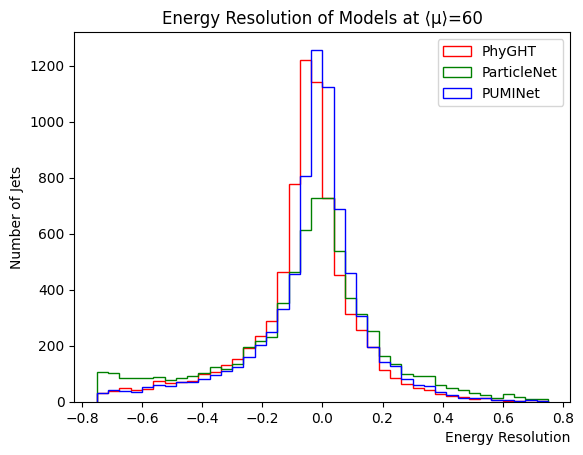

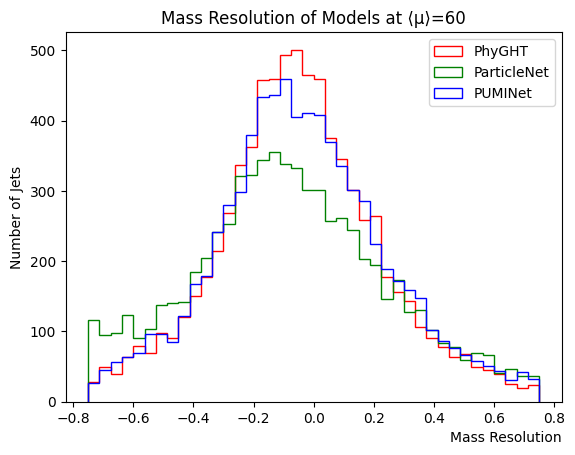

In [8]:
color_list = ['r','g','b']

plt.title("Energy Resolution of Models at \u27E8\u03BC\u27E9="+str(mu))
for i, model in enumerate(results):
    plt.hist(ak.ravel(results[model][0]), histtype='step', label=model, color=color_list[i], bins=40, range=(-0.75,0.75))
plt.legend()
plt.xlabel('Energy Resolution',loc='right')
plt.ylabel('Number of Jets')
plt.show()

plt.title("Mass Resolution of Models at \u27E8\u03BC\u27E9="+str(mu))
for i, model in enumerate(results):
    plt.hist(ak.ravel(results[model][1]), histtype='step', label=model, color=color_list[i], bins=40, range=(-0.75,0.75))
plt.legend()
plt.xlabel('Mass Resolution',loc='right')
plt.ylabel('Number of Jets')
plt.show()